# Data Preparation

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
# Import Dataset
crime=pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/7 clustering/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [12]:
# Handle missing values
crime = crime.dropna()  # Remove rows with missing values or use imputation methods

In [15]:
# Perform feature scaling
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime.iloc[:, 1:])  
# Exclude non-numeric columns if any
crime_scaled

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

# Hierarchical Clustering

In [24]:
# Perform Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


In [27]:
# Perform Hierarchical Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
hierarchical_labels = hierarchical_cluster.fit_predict(crime_scaled)

# Add the cluster labels to the crime_data DataFrame
crime['hierarchical_cluster'] = hierarchical_labels

# Analyze the number of clusters formed
num_clusters = len(np.unique(hierarchical_labels))
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 5


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [28]:
crime

,Murder,Assault,UrbanPop,Rape,hierarchical_cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,4
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,0


In [32]:
# Group the clusters and compute mean values
cluster_means = crime.groupby('hierarchical_cluster').agg(['mean']).reset_index()

# Print the resulting DataFrame
print(cluster_means)

  hierarchical_cluster     Murder   Assault   UrbanPop       Rape
                             mean      mean       mean       mean
0                    0  11.763636  221.0000  58.181818  23.181818
1                    1   5.331250  119.1875  72.750000  16.962500
2                    2   3.720000   79.4000  48.300000  11.610000
3                    3  10.240000  250.0000  74.400000  40.980000
4                    4  10.787500  269.5000  77.250000  26.775000


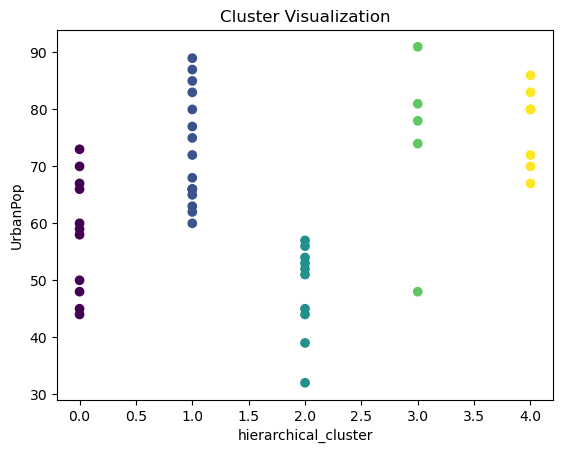

In [52]:
# Visualize the clusters
plt.scatter(crime['hierarchical_cluster'], crime['UrbanPop'], c=crime['hierarchical_cluster'])
plt.xlabel('hierarchical_cluster')
plt.ylabel('UrbanPop')
plt.title('Cluster Visualization')
plt.show()

In [36]:
#Cluster0 :This cluster represent areas with higher crime rates and lower urban population density.
#Cluster1 :This cluster represent areas with lower crime rates and higher urban population density.
#Cluster2 :This cluster represent areas with generally lower crime rates and lower urban population density.
#Cluster3 :This cluster represent areas with higher crime rates and higher urban population density.
#Cluster4 :This cluster represent areas with higher crime rates and higher urban population density.

# K-means clustering


In [47]:
# Perform K-means Clustering
kmeans_cluster = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_cluster.fit_predict(crime_scaled)

# Add the cluster labels to the crime DataFrame
crime['kmeans_cluster'] = kmeans_labels

# Analyze the number of clusters formed
num_clusters = len(set(kmeans_labels))
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 5


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
crime

,Murder,Assault,UrbanPop,Rape,hierarchical_cluster,kmeans_cluster
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,3,1
2,8.1,294,80,31.0,4,3
3,8.8,190,50,19.5,0,1
4,9.0,276,91,40.6,3,3
5,7.9,204,78,38.7,3,3
6,3.3,110,77,11.1,1,0
7,5.9,238,72,15.8,4,4
8,15.4,335,80,31.9,4,3
9,17.4,211,60,25.8,0,1


In [51]:
# Group the clusters and compute mean values
cluster_means = crime.groupby('kmeans_cluster').agg(['mean']).reset_index()

# Print the resulting DataFrame
print(cluster_means)

  kmeans_cluster     Murder     Assault   UrbanPop       Rape  \
                       mean        mean       mean       mean   
0              0   4.757143  123.428571  81.857143  16.071429   
1              1  13.537500  253.000000  52.375000  23.612500   
2              2   3.600000   78.538462  52.076923  12.176923   
3              3  10.890000  270.400000  79.000000  33.330000   
4              4   7.675000  160.416667  68.166667  22.383333   

  hierarchical_cluster  
                  mean  
0             1.000000  
1             0.375000  
2             1.769231  
3             3.600000  
4             1.166667  


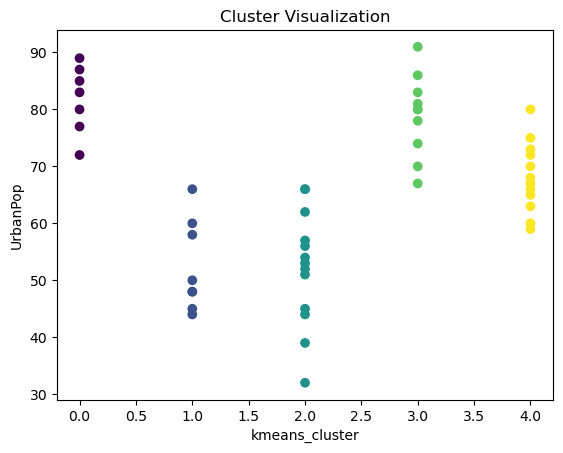

In [53]:
# Visualize the clusters
plt.scatter(crime['kmeans_cluster'], crime['UrbanPop'], c=crime['kmeans_cluster'])
plt.xlabel('kmeans_cluster')
plt.ylabel('UrbanPop')
plt.title('Cluster Visualization')
plt.show()

In [54]:
#Cluster0 :This cluster represent areas with lower crime rates and higher urban population density.
#Cluster1 :This cluster represent areas with higher crime rates and lower urban population density.
#Cluster2 :This cluster represent areas with generally lower crime rates and lower urban population density.
#Cluster3 :This cluster represent areas with higher crime rates and higher urban population density.
#Cluster4 :This cluster represent areas with moderate crime rates and moderate urban population density,with a relatively higher focus on assault cases.


# DBSCAN clustering


In [57]:
# Perform DBSCAN Clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan_cluster.fit_predict(crime_scaled)

# Add the cluster labels to the crime DataFrame
crime['dbscan_cluster'] = dbscan_labels

# Analyze the number of clusters formed
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 1


In [58]:
crime

,Murder,Assault,UrbanPop,Rape,hierarchical_cluster,kmeans_cluster,dbscan_cluster
0,13.2,236,58,21.2,0,1,0
1,10.0,263,48,44.5,3,1,-1
2,8.1,294,80,31.0,4,3,0
3,8.8,190,50,19.5,0,1,0
4,9.0,276,91,40.6,3,3,0
5,7.9,204,78,38.7,3,3,0
6,3.3,110,77,11.1,1,0,0
7,5.9,238,72,15.8,4,4,0
8,15.4,335,80,31.9,4,3,0
9,17.4,211,60,25.8,0,1,0


In [60]:
# Group the clusters and compute mean values
columns_to_include = ['dbscan_cluster', 'Murder', 'Assault', 'UrbanPop', 'Rape']
cluster_means = crime[columns_to_include].groupby('dbscan_cluster').mean().reset_index()

# Print the resulting DataFrame
print(cluster_means)

   dbscan_cluster     Murder     Assault   UrbanPop       Rape
0              -1  10.000000  263.000000  48.000000  44.500000
1               0   7.742857  168.877551  65.897959  20.757143


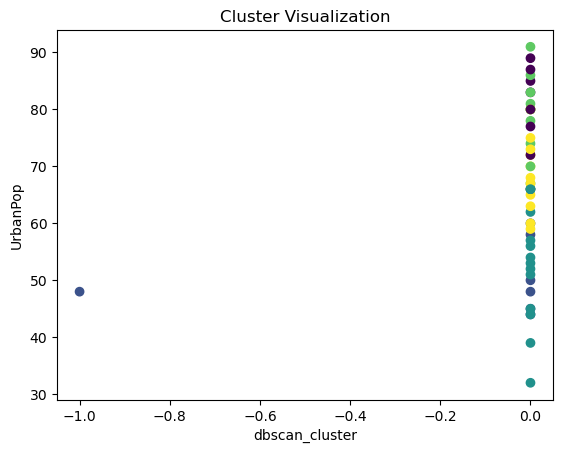

In [61]:
# Visualize the clusters
plt.scatter(crime['dbscan_cluster'], crime['UrbanPop'], c=crime['kmeans_cluster'])
plt.xlabel('dbscan_cluster')
plt.ylabel('UrbanPop')
plt.title('Cluster Visualization')
plt.show()

In [63]:
#cluster-1:This cluster is labeled as -1, which represents the noise points or outliers in the dataset.
        #This cluster represent areas with higher crime rates and lower urban population density that are considered outliers or noise in the dataset.
#cluster0:This cluster represent areas with moderate crime rates and higher urban population density.